In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [44]:
data=pd.read_csv("Diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [45]:
sel_names=['Pregnancies', 'Insulin','BMI','Age','Glucose','BloodPressure','DiabetesPedigreeFunction','SkinThickness']
x=data[sel_names].values
y=data['Outcome'].values.reshape(-1,1)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)
x.shape, y.shape

((768, 8), (768, 1))

In [46]:
DT=DecisionTreeClassifier()
DT.fit(xtrain,ytrain)
DResult=DT.predict(xtest)
metrics.accuracy_score(ytest,DResult)

0.7316017316017316

In [47]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
import graphviz

In [48]:
dot_data=StringIO()

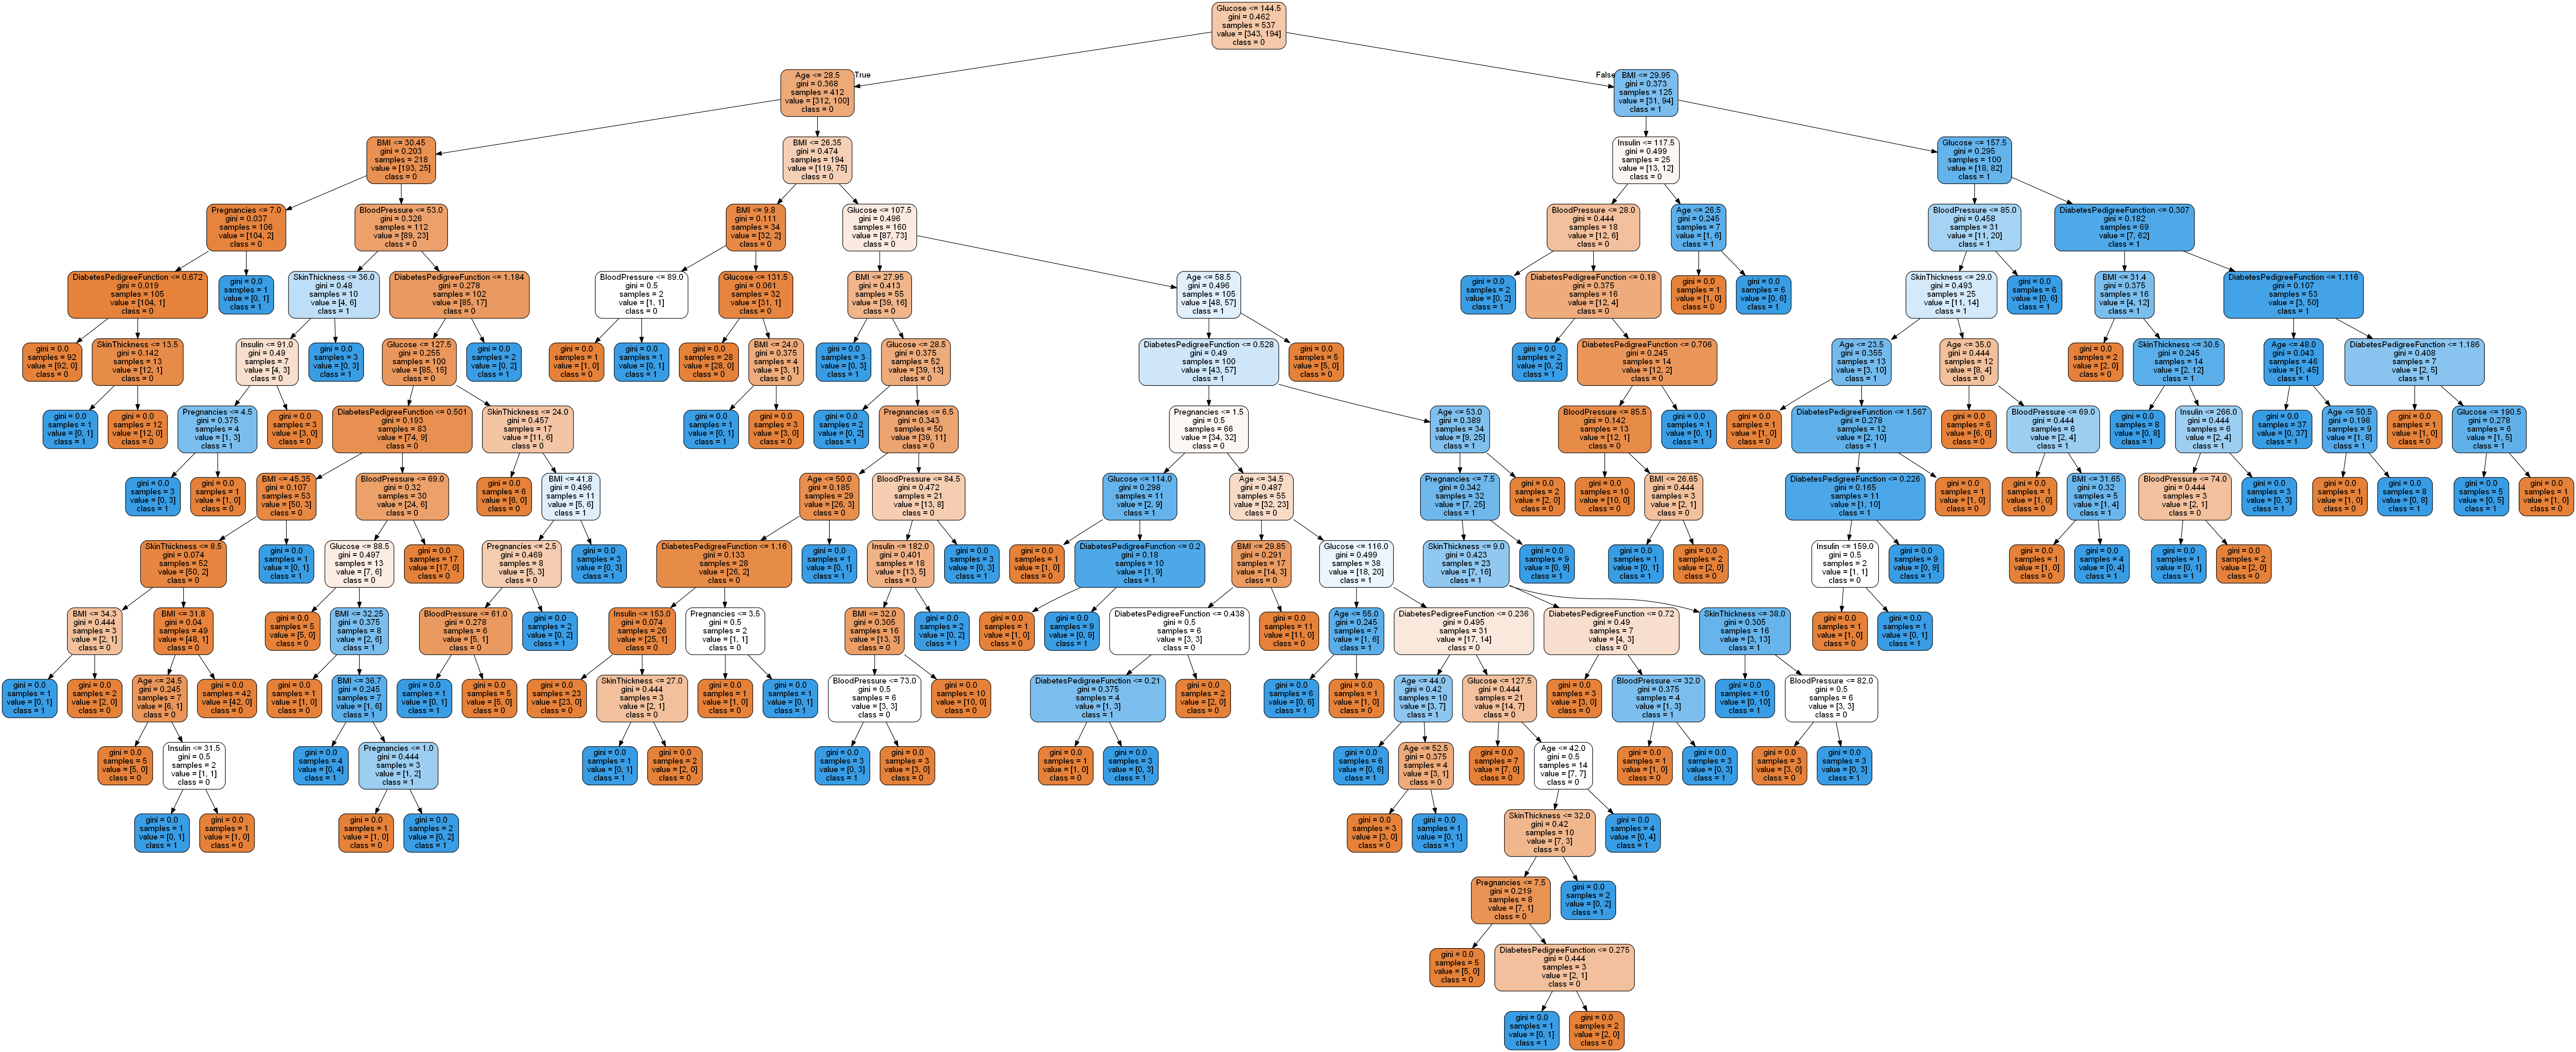

In [50]:
import os
os.environ["PATH"]+=os.pathsep+ 'C:\\Program Files (x86)\\Graphviz2.38\\bin'
export_graphviz(DT, out_file=dot_data, filled=True, rounded=True, feature_names=sel_names, class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graphviz.Source(dot_data.getvalue)
#graph=graphviz.Source(dot_data)
graph
#graph.write_png("test.png")
Image(graph.create_png())

In [51]:
data=pd.read_csv("Car.csv")
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [52]:
data['buying'],class_names=pd.factorize(data['buying'])
data['maint'],_=pd.factorize(data['maint'])
data['doors'],_=pd.factorize(data['doors'])
data['persons'],_=pd.factorize(data['persons'])
data['lug_boot'],_=pd.factorize(data['lug_boot'])
data['safety'],_=pd.factorize(data['safety'])
data['class'],_=pd.factorize(data['class'])

In [53]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1:].values.reshape(-1,1)

In [54]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [55]:
DT.fit(xtrain,ytrain)
DResult=DT.predict(xtest)
metrics.accuracy_score(ytest,DResult)

0.9749518304431599

In [56]:
from sklearn.model_selection import cross_val_score

In [57]:
data=pd.read_csv('Diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [58]:
LR=LogisticRegression()
LR.fit(xtrain,ytrain)
LResult=LR.predict(xtest)
metrics.accuracy_score(ytest,LResult)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.766859344894027

In [60]:
cross_val_score(LR, x,y,cv=10, scoring='accuracy').mean()

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages

0.7574813402688712

In [62]:
cmData=metrics.confusion_matrix(ytest,LResult)
cmData

array([[345,  18,   0,   0],
       [ 62,  53,   0,   0],
       [  0,  16,   0,   0],
       [  8,  17,   0,   0]], dtype=int64)

In [65]:
import scikitplot as skplot
import plot_confusion_matrix
skplot.metrics.plot_confusion_matrix(ytest,LResult)
plt.show()
plot_confusion_matrix(ytest, LResult, cmData, classes=['Non Diabetic','Diabetic'])

ModuleNotFoundError: No module named 'plot_confusion_matrix'

In [67]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(xtrain,ytrain)
KResult=KNN.predict(xtest)
classifiers=([['A',LR],['B',KNN],['C',DT]])

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [69]:
for cf_names,cf in classifiers:
    cf.fit(xtrain,ytrain)
    TResult=cf.predict(xtest)
    TAccuracy=metrics.accuracy_score(ytest,TResult)
    print(TAccuracy)

0.766859344894027
0.9383429672447013
0.976878612716763


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
